In [4]:
from git import Repo
import os
import matplotlib.pylab as plt
import numpy as np

# Open the repository
repo = Repo('.')  # or path to your repo

# Get all commits that touched a file
commits = list(repo.iter_commits(paths='config/instrument_config.ini'))

In [5]:
commits

[<git.Commit "e71644f4a5f87c25d1de394d7e8226963e6da1dc">,
 <git.Commit "0e832aa684e684a9331a59193ea948cb878bae35">,
 <git.Commit "a5b1553c8be59578d20c3aeea6193cacd0281dfe">,
 <git.Commit "29eae5799022290e6a03803391439cc12c942450">,
 <git.Commit "96587a30b3db88430724fe6fdb742c6354eab4db">,
 <git.Commit "f1e29aa1d13e2c335ec86e73d4bdd57de72141b2">,
 <git.Commit "90e2375528852ca3e0493904e9a1967bf6b07b67">,
 <git.Commit "009e23e580be176034af5e539c2a1a84d868ddc1">,
 <git.Commit "2433f14cebf3406fda253ec508c1738eff91285b">,
 <git.Commit "e51f4c21f4c31fc095a329f93e5948246df3c106">,
 <git.Commit "17c76f2a8cf9b4854e3916548f1efc2f15d10dd4">,
 <git.Commit "e5b0a523c9da6c900ef2cb7394a1aa02d37f380a">,
 <git.Commit "01e2d20e244b591def026b8dc378ebbf07903666">,
 <git.Commit "93360760be060f228c93f2a70dc7c5306e06419f">,
 <git.Commit "05244521f4b31ec1dd0facd4736ac516b1c4f02f">,
 <git.Commit "a471f4abadb9fd02dd24f331ffced6e9d8a2c1fa">,
 <git.Commit "7f97f7c2fb5b292ba7b4634625a53700801fe0b2">,
 <git.Commit "

In [6]:
commit_dates_1074 = []
commit_dates_1079 = []
o1_pos_1074 = []
o1_pos_1079 = []

for commit in commits:
    file_content = commit.tree/'config/instrument_config.ini'
    
    section_found = False
    for line in file_content.data_stream.read().decode('utf-8').split("\n"):
        if "FILTER 789" in line:
            section_found = True
        if section_found:
            if "O1#1 Pos".lower() in line.lower() or "o1 pos".lower() in line.lower():
                print(float(line.split()[-1]) ,commit.committed_datetime.strftime("%Y%m%d.%H%M%S"),commit.hexsha[:7])
                o1_pos_1079.append(float(line.split()[-1]))
                commit_dates_1079.append(commit.committed_datetime)
                break  

39.29 20250522.054551 e71644f
39.29 20250323.113535 0e832aa
39.29 20250322.092451 a5b1553
39.29 20250319.140210 29eae57
39.29 20250207.101710 96587a3
39.29 20250130.192354 f1e29aa
39.29 20241125.094322 90e2375
39.29 20241017.145703 009e23e
39.29 20221124.183425 2433f14
39.29 20221123.144351 e51f4c2
39.29 20221122.183828 17c76f2
39.29 20221122.101319 e5b0a52
39.29 20221121.055559 01e2d20
39.29 20221120.070231 9336076
39.29 20221116.180709 0524452
38.74 20221114.113201 a471f4a
38.74 20221113.185136 7f97f7c
38.74 20220926.090339 cdab82a
38.74 20220922.180849 1549e21
38.74 20220722.104537 65a13b4
38.74 20220721.072104 47af720
38.74 20220614.213651 e4a3dc7
38.74 20220526.170651 10a0e8d
38.74 20220511.134946 ad46cb9
38.74 20220429.065450 e0d1ba6
38.74 20220425.130009 eb5e108
38.74 20220425.064525 6df196e
38.74 20220421.132249 01a68d2
38.74 20220413.065350 c72649f
38.74 20220413.065322 355e211
38.74 20220412.132213 a376e86
38.74 20220411.144731 5321c57
38.74 20220330.081545 92a48a9
38.74 2022

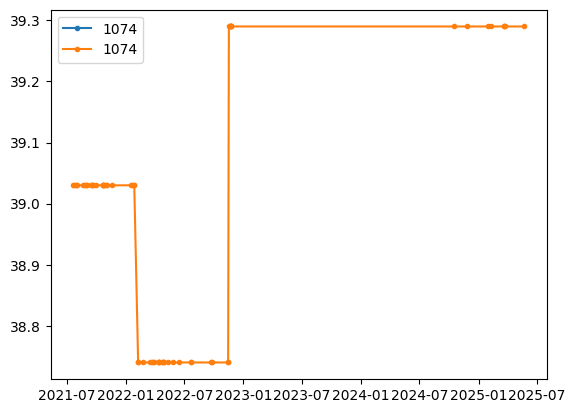

In [7]:


plt.plot(commit_dates_1074,o1_pos_1074,".-",label="1074")
plt.plot(commit_dates_1079,o1_pos_1079,".-",label="1074")
plt.legend()

In [8]:
max_commit = 5
min_commit = 8
plt.plot(commit_dates_1074[min_commit:-max_commit],np.array(o1_pos_1074[min_commit:-max_commit])-np.min(o1_pos_1074[min_commit:-max_commit]),".-",label="1074")
plt.plot(commit_dates_1079[min_commit:-max_commit],np.array(o1_pos_1079[min_commit:-max_commit])-np.min(o1_pos_1079[min_commit:-max_commit]),".-",label="1079")
plt.legend()

ValueError: zero-size array to reduction operation minimum which has no identity

In [9]:
perdict_foucs = """  530.000      1.83116
      637.000      21.8907
      670.000      26.4444
      706.000      30.8324
      761.000      36.6346
      789.000      39.2600
      802.000      40.4169
      991.000      54.2905
      1074.00      59.3551
      1079.00      59.6493
      1432.00      79.3596"""
expected_foucs = {}
for wave_region in perdict_foucs.split("\n"):
    wave_region, focus_pos = wave_region.split()
    expected_foucs[float(wave_region)] = float(focus_pos)

#expected_focus = np.array(perdict_foucs.split()).reshape(-1,2).astype(float)

#list(zip(expected_focus[:,0],expected_focus[:,1]-expected_focus[8,1]))


In [10]:
expected_foucs[1074.0]

59.3551

In [26]:
filters = {}

for commit in commits:
    file_content = commit.tree/'config/instrument_config.ini'
    wave_region = ""
    for line in file_content.data_stream.read().decode('utf-8').split("\n"):
        if "[FILTER" in line:
            wave_region = float(line.split()[-1].split("]")[0])
        if ("O1#1 Pos".lower() in line.lower() or "o1 pos".lower() in line.lower()) and wave_region != "":
            if wave_region not in  filters:
                filters[wave_region] = []
            try:
                filters[wave_region].append([commit.committed_datetime,float(line.split()[-1])])#,commit.hexsha[:7]])
            except Exception as e:
                print(f"execption {e}")
                pass
            wave_region = ""

filters



execption could not convert string to float: '='
execption could not convert string to float: '='
execption could not convert string to float: '='
execption could not convert string to float: '='


{637.0: [[datetime.datetime(2025, 5, 22, 5, 45, 51, tzinfo=<git.objects.util.tzoffset object at 0x000001ED69799B50>),
   21.49],
  [datetime.datetime(2025, 3, 23, 11, 35, 35, tzinfo=<git.objects.util.tzoffset object at 0x000001ED6979A030>),
   21.49],
  [datetime.datetime(2025, 3, 22, 9, 24, 51, tzinfo=<git.objects.util.tzoffset object at 0x000001ED6979A510>),
   21.49],
  [datetime.datetime(2025, 3, 19, 14, 2, 10, tzinfo=<git.objects.util.tzoffset object at 0x000001ED6979A9F0>),
   21.49],
  [datetime.datetime(2025, 2, 7, 10, 17, 10, tzinfo=<git.objects.util.tzoffset object at 0x000001ED6979AED0>),
   21.49],
  [datetime.datetime(2025, 1, 30, 19, 23, 54, tzinfo=<git.objects.util.tzoffset object at 0x000001ED6979B3B0>),
   21.49],
  [datetime.datetime(2024, 11, 25, 9, 43, 22, tzinfo=<git.objects.util.tzoffset object at 0x000001ED6979B890>),
   21.49],
  [datetime.datetime(2024, 10, 17, 14, 57, 3, tzinfo=<git.objects.util.tzoffset object at 0x000001ED697996D0>),
   21.49],
  [datetime.d

In [12]:
do_keys= [637.0,706.0,789.0,1074.0,1079.0]
offset = .5
plt.figure(figsize=(12,8))
min_commit = 2
max_commit = 8
for key in filters.keys():
    if key in do_keys:
        perdict = 0
        try:
            perdict = expected_foucs[key]
        except:
            pass
            

        arr = np.array(filters[key])[max_commit:-min_commit,:]
        plt.plot(arr[:,0],arr[:,1]-0,".-",label=key)
plt.legend()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1200x800 with 0 Axes>

In [13]:
for ll in filters[1079]:
    if ll[1] < 60:
        print(ll[1])

In [14]:
baseline = np.array(filters[1074.0])[:,1]
for key in filters.keys():
    if key == 1074.0 or key == 691.0 or key == 656.0 or key == 530.0:
        continue
    if len(filters[key]) == 66:
        a = baseline - np.array(filters[key])[:,1]
        plt.plot(np.array(filters[key])[:,0],a-np.mean(a),label=key)
plt.legend()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [27]:
for key in filters.keys():
    print(key,np.array(filters[key]).shape)

637.0 (62, 2)
670.0 (17, 2)
706.0 (66, 2)
761.0 (17, 2)
789.0 (66, 2)
802.0 (17, 2)
991.0 (17, 2)
1074.0 (66, 2)
1079.0 (66, 2)
656.0 (66, 2)
691.0 (66, 2)
530.0 (66, 2)
1083.0 (66, 2)


filters[789.0][20:30]

In [17]:
filters.keys()

dict_keys([637.0, 670.0, 706.0, 761.0, 789.0, 802.0, 991.0, 1074.0, 1079.0, 656.0, 691.0, 530.0, 1083.0])